# DATA SCIENCE AND BUSINESS ANALYTICS INTERN at SPARKS FOUNDATION #GRIPJAN21¶
    Author: Rupak Dey
    TASK 2: predict the optimum number of clusters and represent it visually.
    Create a K-Means Clustering Algorithm to predict the clusters.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.drop(["Id"],axis=1,inplace=True)# dropped
df.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
features = df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=99)

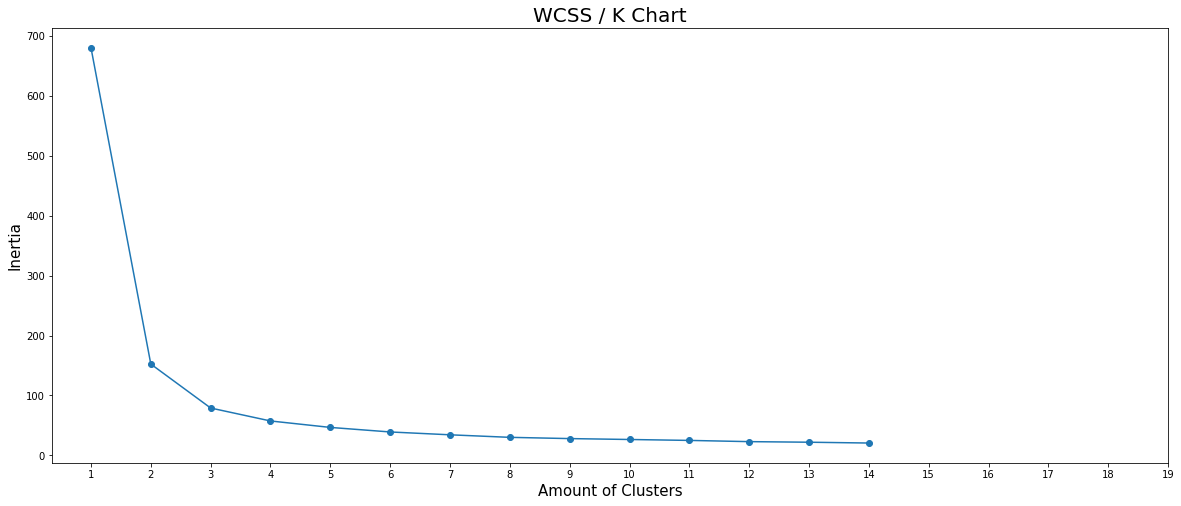

In [8]:
#Predicting the optimum value of K by elbow method
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=20)
plt.plot(range(1,15),wcss,"-o")
plt.xlabel("Amount of Clusters",fontsize=15)
plt.ylabel("Inertia",fontsize=15)
plt.xticks(range(1,20))
plt.show()


# As the elbow method showing approximately an optimum cluster of two or three so in order to get accurate results we are testing with clusters from one to four

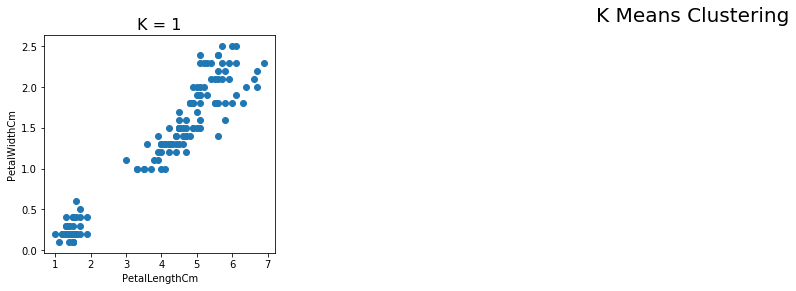

In [22]:
plt.figure(figsize=(24,4))
plt.suptitle("K Means Clustering",fontsize=20)
plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)

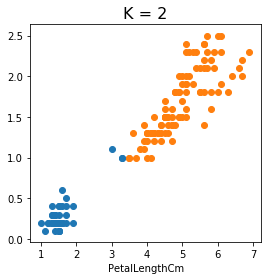

In [21]:
plt.figure(figsize=(24,4))
plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

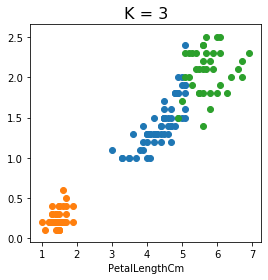

In [19]:
# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)
plt.figure(figsize=(24,4))
plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

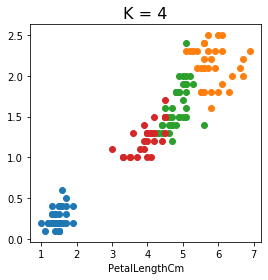

In [18]:
# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)
plt.figure(figsize=(24,4))
plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

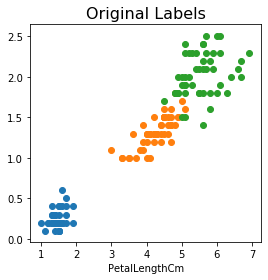

In [23]:
# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)
plt.figure(figsize=(24,4))
plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.PetalLengthCm[df.Species == "Iris-setosa"],df.PetalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-versicolor"],df.PetalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-virginica"],df.PetalWidthCm[df.Species == "Iris-virginica"])

# Kmeans visibly did an amazing job with three clusters.

In [24]:
# kmeans
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(features)

# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':kmeans_predict,"Species":df['Species']})


In [26]:
df1.head(10
    )

,labels,Species
0,1,Iris-setosa
1,1,Iris-setosa
2,1,Iris-setosa
3,1,Iris-setosa
4,1,Iris-setosa
5,1,Iris-setosa
6,1,Iris-setosa
7,1,Iris-setosa
8,1,Iris-setosa
9,1,Iris-setosa
